[View in Colaboratory](https://colab.research.google.com/github/gopal2812/mlblr/blob/master/experimentwithdataaugmentation.ipynb)

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_9 (InputLayer)            (None, 32, 32, 3)    0                                            
__________________________________________________________________________________________________
conv2d_289 (Conv2D)             (None, 32, 32, 64)   1728        input_9[0][0]                    
__________________________________________________________________________________________________
batch_normalization_289 (BatchN (None, 32, 32, 64)   256         conv2d_289[0][0]                 
__________________________________________________________________________________________________
activation_289 (Activation)     (None, 32, 32, 64)   0           batch_normalization_289[0][0]    
__________________________________________________________________________________________________
conv2d_290

391/391 [==============================] - 207s 528ms/step - loss: 1.7806 - acc: 0.3531 - val_loss: 2.6452 - val_acc: 0.3247
Epoch 2/10
314/391 [=======================>......] - ETA: 34s - loss: 1.4979 - acc: 0.4553

391/391 [==============================] - 188s 482ms/step - loss: 1.4807 - acc: 0.4613 - val_loss: 1.9768 - val_acc: 0.4180
Epoch 3/10
391/391 [==============================] - 188s 481ms/step - loss: 1.3230 - acc: 0.5244 - val_loss: 1.2566 - val_acc: 0.5701
Epoch 4/10
 24/391 [>.............................] - ETA: 2:45 - loss: 1.2294 - acc: 0.5527

391/391 [==============================] - 188s 481ms/step - loss: 1.2149 - acc: 0.5623 - val_loss: 2.6525 - val_acc: 0.4107
Epoch 5/10
323/391 [=======================>......] - ETA: 30s - loss: 1.1508 - acc: 0.5892

391/391 [==============================] - 188s 481ms/step - loss: 1.1436 - acc: 0.5913 - val_loss: 1.3311 - val_acc: 0.5848
Epoch 6/10
391/391 [==============================] - 188s 481ms/step - loss: 1.0747 - acc: 0.6191 - val_loss: 2.4330 - val_acc: 0.4718
Epoch 7/10
 26/391 [>.............................] - ETA: 2:44 - loss: 1.0520 - acc: 0.6352

391/391 [==============================] - 188s 482ms/step - loss: 1.0182 - acc: 0.6406 - val_loss: 1.6464 - val_acc: 0.5512
Epoch 8/10
324/391 [=======================>......] - ETA: 30s - loss: 0.9799 - acc: 0.6537

391/391 [==============================] - 188s 481ms/step - loss: 0.9781 - acc: 0.6547 - val_loss: 1.1520 - val_acc: 0.6304
Epoch 9/10
391/391 [==============================] - 188s 481ms/step - loss: 0.9358 - acc: 0.6702 - val_loss: 1.9780 - val_acc: 0.5080
Epoch 10/10
 26/391 [>.............................] - ETA: 2:44 - loss: 0.9117 - acc: 0.6839

10000/10000 [==============================] - 17s 2ms/step
Test loss: 1.2497921279907227
Test accuracy: 0.6196


Text(0.5,1,'Accuracy Curves')

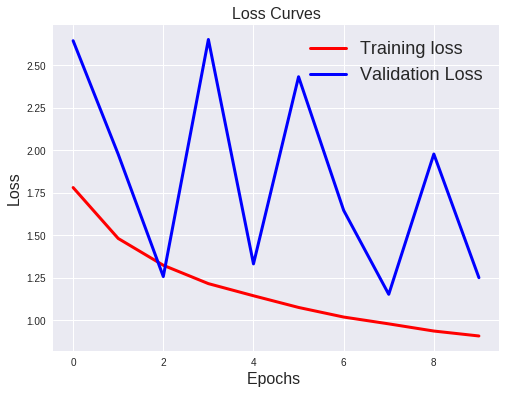

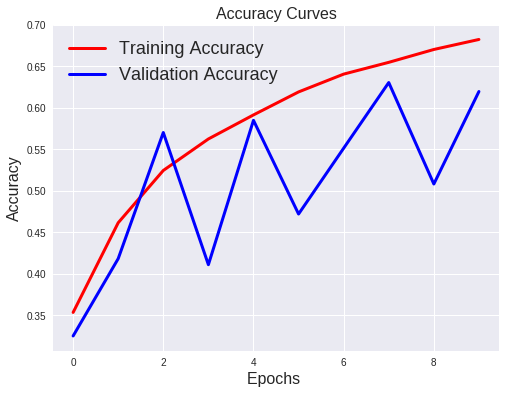

In [9]:
!pip install -q keras
import keras

import keras
from keras.datasets import cifar10
from keras.models import Model, Sequential
from keras.layers import Dense, Dropout, Flatten, Input, AveragePooling2D, merge, Activation
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.layers import Concatenate
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
import matplotlib.pyplot as plt

# this part will prevent tensorflow to allocate all the avaliable GPU Memory
# backend
import tensorflow as tf
from keras import backend as k

# Don't pre-allocate memory; allocate as-needed
config = tf.ConfigProto()
config.gpu_options.allow_growth = True

# Create a session with the above options specified.
k.tensorflow_backend.set_session(tf.Session(config=config))

batch_size = 128
num_classes = 10
epochs = 10
l = 24
num_filter = 64
compression = 0.5
dropout_rate = 0.1

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
img_height, img_width, channel = x_train.shape[1],x_train.shape[2],x_train.shape[3]

# convert to one hot encoing 
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

# Dense Block
def add_denseblock(input, num_filter = 12, dropout_rate = 0.2):
    global compression
    temp = input
    for _ in range(l):
        BatchNorm = BatchNormalization()(temp)
        relu = Activation('relu')(BatchNorm)
        Conv2D_3_3 = Conv2D(int(num_filter*compression), (3,3), use_bias=False ,padding='same')(relu)
        if dropout_rate>0:
          Conv2D_3_3 = Dropout(dropout_rate)(Conv2D_3_3)
        concat = Concatenate(axis=-1)([temp,Conv2D_3_3])
        
        temp = concat
        
    return temp
  
def add_transition(input, num_filter = 12, dropout_rate = 0.2):
    global compression
    BatchNorm = BatchNormalization()(input)
    relu = Activation('relu')(BatchNorm)
    Conv2D_BottleNeck = Conv2D(int(num_filter*compression), (1,1), use_bias=False ,padding='same')(relu)
    if dropout_rate>0:
      Conv2D_BottleNeck = Dropout(dropout_rate)(Conv2D_BottleNeck)
    avg = AveragePooling2D(pool_size=(2,2), strides=(2, 2))(Conv2D_BottleNeck)
    
    return avg
  
def output_layer(input):
    global compression
    BatchNorm = BatchNormalization()(input)
    relu = Activation('relu')(BatchNorm)
    AvgPooling = AveragePooling2D(pool_size=(2,2), strides=(2, 2))(relu)
    flat = Flatten()(AvgPooling)
    output = Dense(num_classes, activation='softmax')(flat)
    
    return output
  
num_filter = 64
dropout_rate = 0.1
l = 8
input = Input(shape=(img_height, img_width, channel,))
First_Conv2D = Conv2D(num_filter, (3,3), use_bias=False ,padding='same')(input)

First_Block = add_denseblock(First_Conv2D, num_filter=16, dropout_rate=0.1)
First_Transition = add_transition(First_Block, num_filter=16, dropout_rate=0.1)

Second_Block = add_denseblock(First_Transition, num_filter=32, dropout_rate=0.1)
Second_Transition = add_transition(Second_Block, num_filter=32, dropout_rate=0.1)

Third_Block = add_denseblock(Second_Transition, num_filter=64, dropout_rate=0.2)
Third_Transition = add_transition(Third_Block, num_filter=64, dropout_rate=0.2)

Last_Block = add_denseblock(Third_Transition,  num_filter=128, dropout_rate=0.2)
output = output_layer(Last_Block)

model = Model(inputs=[input], outputs=[output])
model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])

datagen = ImageDataGenerator(
         featurewise_center=False,
         samplewise_center=False,
         featurewise_std_normalization=False,
         samplewise_std_normalization=False,
         zca_whitening=False,
         rotation_range=45,
         width_shift_range=.1,
         height_shift_range=.1,
         shear_range=0.,
         #zoom_range=[.8, 1],
         channel_shift_range=20,
         fill_mode='nearest',
         cval=0.,
         horizontal_flip=True,
         vertical_flip=False,
         rescale=None
         )
    
#         zoom_range=0.2, # randomly zoom into images
#         rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
#        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
#        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
#        horizontal_flip=True,  # randomly flip images
#        vertical_flip=False)  # randomly flip images
 
# Fit the model on the batches generated by datagen.flow().
history = model.fit_generator(datagen.flow(x_train, y_train, batch_size=batch_size),
                               epochs=epochs,verbose=1, validation_data=(x_test, y_test),
                                workers=4)
 

#history= model.fit(x_train, y_train,
#                    batch_size=batch_size,
#                    epochs=epochs,
#                    verbose=1,
#                    validation_data=(x_test, y_test))

score = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# Loss Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)
 
# Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['acc'],'r',linewidth=3.0)
plt.plot(history.history['val_acc'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)